In [48]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
%matplotlib inline

In [70]:
weatherAUS_data = pd.read_csv('weatherAUS.csv')

In [71]:
weatherAUS_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [72]:
# Dropping all Null value records
weatherAUS_data = weatherAUS_data.dropna()

In [73]:
# list(weatherAUS_data['WindGustDir'].unique())

In [74]:
# Converting string values to Integers for processing
columns_to_be_converted = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]
column_int_dicts = dict()

for i in columns_to_be_converted:
    this_column_dict = dict()
    column_values = list(weatherAUS_data[i].unique())
    for j in range(len(column_values)):
        this_column_dict[column_values[j]] = j
    column_int_dicts[i] = this_column_dict

In [75]:
# Int Values assigned to each string value in a column
column_int_dicts

{'Location': {'Cobar': 0,
  'CoffsHarbour': 1,
  'Moree': 2,
  'NorfolkIsland': 3,
  'Sydney': 4,
  'SydneyAirport': 5,
  'WaggaWagga': 6,
  'Williamtown': 7,
  'Canberra': 8,
  'Sale': 9,
  'MelbourneAirport': 10,
  'Melbourne': 11,
  'Mildura': 12,
  'Portland': 13,
  'Watsonia': 14,
  'Brisbane': 15,
  'Cairns': 16,
  'Townsville': 17,
  'MountGambier': 18,
  'Nuriootpa': 19,
  'Woomera': 20,
  'PerthAirport': 21,
  'Perth': 22,
  'Hobart': 23,
  'AliceSprings': 24,
  'Darwin': 25},
 'WindGustDir': {'SSW': 0,
  'S': 1,
  'NNE': 2,
  'WNW': 3,
  'N': 4,
  'SE': 5,
  'ENE': 6,
  'NE': 7,
  'E': 8,
  'SW': 9,
  'W': 10,
  'WSW': 11,
  'NNW': 12,
  'ESE': 13,
  'SSE': 14,
  'NW': 15},
 'WindDir9am': {'ENE': 0,
  'SSE': 1,
  'NNE': 2,
  'WNW': 3,
  'NW': 4,
  'N': 5,
  'S': 6,
  'SE': 7,
  'NE': 8,
  'W': 9,
  'SSW': 10,
  'E': 11,
  'NNW': 12,
  'ESE': 13,
  'WSW': 14,
  'SW': 15},
 'WindDir3pm': {'SW': 0,
  'SSE': 1,
  'NNW': 2,
  'WSW': 3,
  'WNW': 4,
  'S': 5,
  'ENE': 6,
  'N': 7,
 

In [76]:
# Converting string values to Int values
for i in columns_to_be_converted:
    weatherAUS_data[i+"_Int"] = weatherAUS_data[i].apply(lambda x: column_int_dicts[i][x])

In [77]:
weatherAUS_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp9am,Temp3pm,RainToday,RainTomorrow,Location_Int,WindGustDir_Int,WindDir9am_Int,WindDir3pm_Int,RainToday_Int,RainTomorrow_Int
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,26.6,33.4,No,No,0,0,0,0,0,0
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,20.3,27.0,No,No,0,1,1,1,0,0
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,28.7,34.9,No,No,0,2,2,2,0,0
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,29.1,35.6,No,No,0,3,3,3,0,0
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,33.6,37.6,No,No,0,3,4,4,0,0


In [78]:
weatherAUS_data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Location_Int',
       'WindGustDir_Int', 'WindDir9am_Int', 'WindDir3pm_Int', 'RainToday_Int',
       'RainTomorrow_Int'],
      dtype='object')

In [79]:
# Features to be selected
columns_to_be_considered_in_x = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Int', 'WindGustDir_Int', 'WindDir9am_Int', 'WindDir3pm_Int', 'RainToday_Int']

In [80]:
# X parameters
df_x = weatherAUS_data[columns_to_be_considered_in_x]

In [81]:
# df_x.dropna().shape

(56420, 20)

In [82]:
# Y target values
df_y = weatherAUS_data[['RainTomorrow_Int']]

In [83]:
# Converting data parameters and target to numpy arrays
X = df_x.to_numpy()
y = df_y.to_numpy().ravel()

In [84]:
# y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=511)

In [65]:
# Finding optimum k
# Prefer Odd k for binary classification

k_neighbours = [10, 16]
error_rate = []

for i in range(k_neighbours[0], k_neighbours[1]):
    print("Using i as", i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))


Using i as 11
Using i as 13


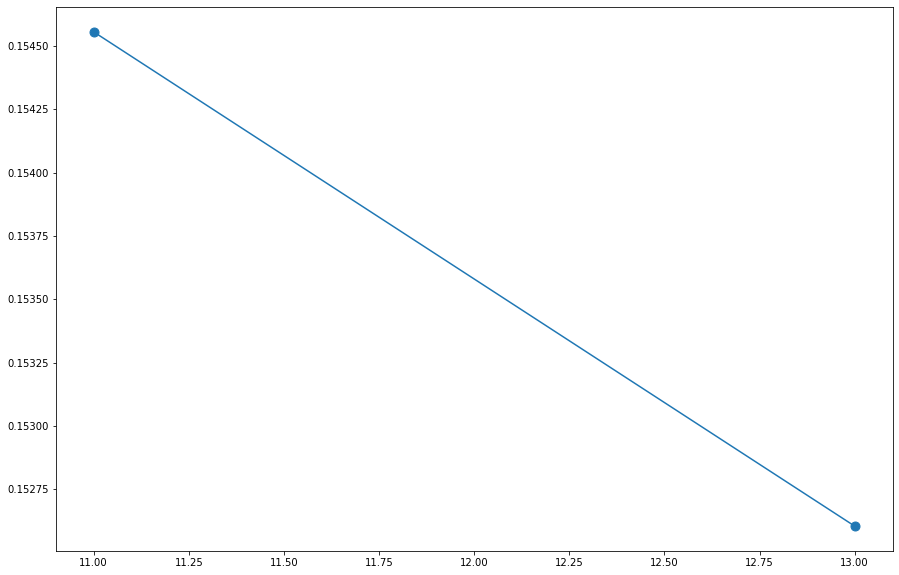

In [66]:
plt.figure(figsize=(15,10))
plt.plot(range(k_neighbours[0], k_neighbours[1]),error_rate, marker='o', markersize=9)

In [86]:
knn = KNeighborsClassifier(n_neighbors=13)

In [87]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [89]:
knn.predict([[22.7, 33.1, 0., 5.8, 8.7, 7., 17., 76., 65., 1017.9, 950., 15., 7., 26.9, 29., 28., 14., 4., 2., 0.]])[0]
# 0 means Prediction of rain tomorrow is No
# 1 means Prediction of rain tomorrow is Yes -> 'RainTomorrow': {'No': 0, 'Yes': 1}

1